## Data augmentation

write some theory from the article

In [1]:
!pip install fastai2

     |████████████████████████████████| 184 kB 2.8 MB/s 


In [2]:
from fastai2.vision.all import *

In [3]:
base = Path('../input/rsna-hemorrhage-jpg')

In [4]:
fn = get_image_files(base/'train_jpg/train_jpg/')
len(fn)

194082

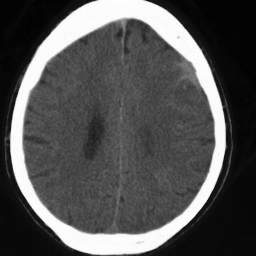

In [5]:
img = PILImage.create(fn[3], mode = 'L')
img

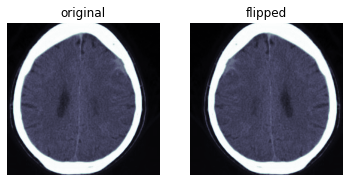

In [6]:
_,axs = subplots(1,2)
show_image(img, ctx=axs[0], title='original', cmap = plt.cm.bone)
show_image(img.flip_lr(), ctx=axs[1], title='flipped', cmap = plt.cm.bone);

Resize and crop already aapan kelay to avoid background. Only the image is seen. Also if we crop more we might accidentally crop out the bleed.

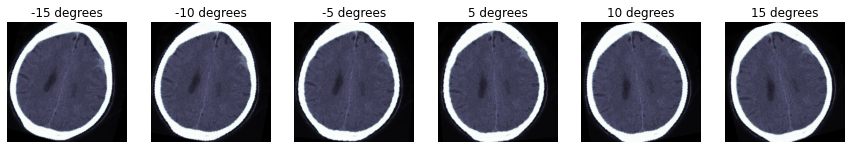

In [7]:
thetas = [-15,-10,-5,5,10,15]
_,axs = plt.subplots(1,6, figsize=(15,3))
for i,ax in enumerate(axs.flatten()):
    show_image(img.rotate(thetas[i]), ctx=ax, title=f'{thetas[i]} degrees', cmap = plt.cm.bone)

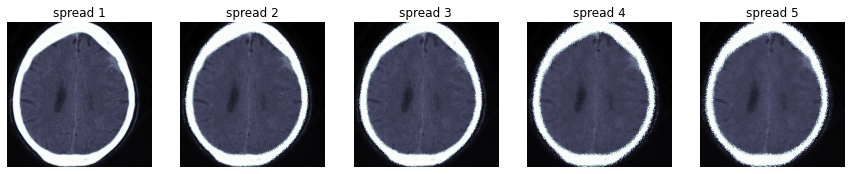

In [8]:
fig,axs = plt.subplots(1,5, figsize=(15,3))
for i,ax in enumerate(axs.flatten()):
    show_image(img.effect_spread(i+1), ctx=ax, title=f'spread {i+1}', cmap=plt.cm.bone)

Warp and brightness

Progressive image resizing

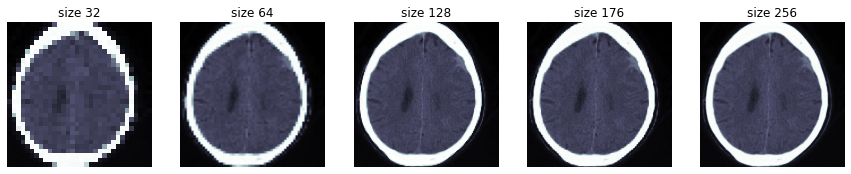

In [9]:
st = [(32,32),(64,64),(128,128),(176,176), (256,256)]
fig,axs = plt.subplots(1,5, figsize=(15,3))
for i,ax in enumerate(axs.flatten()):
    show_image(img.resize(st[i]), ctx=ax, title=f'size {st[i][0]}', cmap=plt.cm.bone)